# 1c

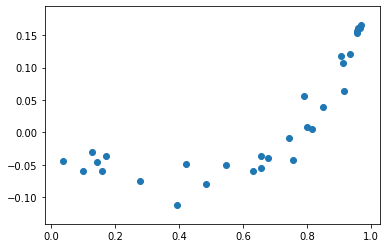

In [147]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import math

in_data = loadmat('polydata.mat')
# print([key for key in in_data])
a = in_data['a']
b = in_data['b']
plt.scatter(a, b)
plt.show()


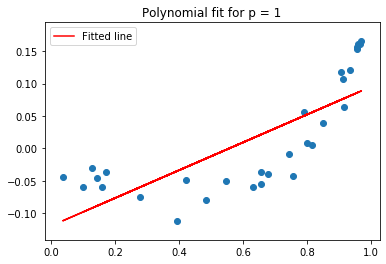

In [78]:
# Linear fit
# A = [[x 1]]
A = np.vstack([a[:,0], np.ones(len(a[:,0]))]).T 
w1, w0= np.linalg.lstsq(A, b, rcond=None)[0]
plt.scatter(a, b)
plt.plot(a, w1*a+w0, 'r', label = "Fitted line");
plt.title("Polynomial fit for p = 1")
plt.legend()
plt.show()


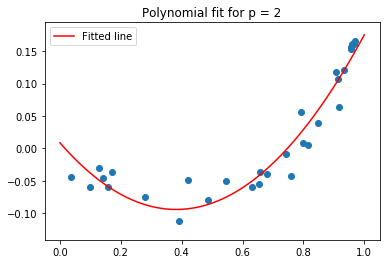

In [141]:
# Quadratic fit  
# A = [[X^2 x 1]]
a1 = np.array(a[:,0])
a2 = np.square(a1)
A = np.vstack([a2, a1, np.ones(len(a[:,0]))]).T 
w2, w1, w0= np.linalg.lstsq(A, b, rcond=None)[0]
plt.scatter(a, b)
x = np.linspace(0, 1, 100)
y = w2* x**2 + w1*x + w0
line = plt.plot(x, y, 'r', label = "Fitted line");
plt.title("Polynomial fit for p = 2")
plt.legend()
plt.show()

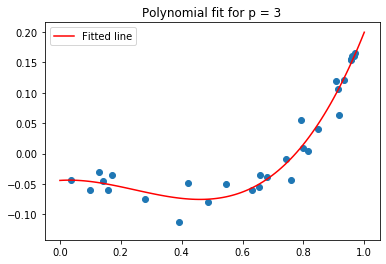

In [143]:
# Cubic fit  
# A = [[X^3 X^2 x 1]]
a1 = np.array(a[:,0])
a2 = np.square(a1)
a3 = np.power(a1, 3)
A = np.vstack([a3, a2, a1, np.ones(len(a[:,0]))]).T 
w3, w2, w1, w0= np.linalg.lstsq(A, b, rcond=None)[0]
plt.scatter(a, b)
x = np.linspace(0, 1, 100)
y = w3*x**3 + w2* x**2 + w1*x + w0
line = plt.plot(x, y, 'r', label = "Fitted line");
plt.title("Polynomial fit for p = 3")
plt.legend()
plt.show()

# 3

In [144]:
def gram_schmidt(B):
    """Orthogonalize a set of vectors stored as the columns of matrix B."""
    # Get the number of vectors.
    m, n = B.shape
    # Create new matrix to hold the orthonormal basis
    U = np.zeros([m,n]) 
    for j in range(n):
        # To orthogonalize the vector in column j with respect to the
        # previous vectors, subtract from it its projection onto
        # each of the previous vectors.
        v = B[:,j].copy()
        for k in range(j):
            v -= np.dot(U[:, k], B[:, j]) * U[:, k]
        if np.linalg.norm(v)>1e-10:
            U[:, j] = v / np.linalg.norm(v)
    return U

if __name__ == '__main__':
    B1 = np.array([[1.0, 1.0, 0.0], [2.0, 2.0, 0.0], [2.0, 2.0, 1.0]])
    A1 = gram_schmidt(B1)
    print(A1)
    A2 = gram_schmidt(np.random.rand(4,2)@np.random.rand(2,5))
    print(A2.transpose()@A2)

[[ 0.33333333  0.         -0.2981424 ]
 [ 0.66666667  0.         -0.59628479]
 [ 0.66666667  0.          0.74535599]]
[[1.00000000e+00 9.66058004e-15 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [9.66058004e-15 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


## 3a

In [184]:
in_data = loadmat("movie.mat")
print([key for key in in_data])
X = in_data['X']
print("X = ", X)
u = np.array([[1.],[1.],[1.],[1.],[1.]])
X_head = np.hstack((u, X))
print("X_head = ", X_head)
X_head = gram_schmidt(X_head)
np.set_printoptions(precision=3, suppress = True)
print("X_head = \n", X_head)

print("The first basis vector is equal to t1.")

['__header__', '__version__', '__globals__', 'X']
X =  [[ 4  7  2  8  7  4  2]
 [ 9  3  5  6 10  5  5]
 [ 4  8  3  7  6  4  1]
 [ 9  2  6  5  9  5  4]
 [ 4  9  2  8  7  4  1]]
X_head =  [[ 1.  4.  7.  2.  8.  7.  4.  2.]
 [ 1.  9.  3.  5.  6. 10.  5.  5.]
 [ 1.  4.  8.  3.  7.  6.  4.  1.]
 [ 1.  9.  2.  6.  5.  9.  5.  4.]
 [ 1.  4.  9.  2.  8.  7.  4.  1.]]
X_head = 
 [[ 0.447 -0.365 -0.632 -0.516  0.     0.     0.     0.   ]
 [ 0.447  0.548  0.316 -0.387  0.     0.     0.     0.5  ]
 [ 0.447 -0.365  0.     0.645  0.     0.     0.     0.5  ]
 [ 0.447  0.548 -0.316  0.387  0.     0.     0.    -0.5  ]
 [ 0.447 -0.365  0.632 -0.129  0.     0.     0.    -0.5  ]]
The first basis vector is equal to t1.


## 3b

In [213]:
t1 = (X_head[:, 0])
t1 = t1.reshape(-1, 1)
W = t1.T @ X
print("W = ", W)
E = X - t1@W
print("E = \n", E)

W =  [[13.416 12.969  8.05  15.205 17.441  9.839  5.814]]
E = 
 [[-2.   1.2 -1.6  1.2 -0.8 -0.4 -0.6]
 [ 3.  -2.8  1.4 -0.8  2.2  0.6  2.4]
 [-2.   2.2 -0.6  0.2 -1.8 -0.4 -1.6]
 [ 3.  -3.8  2.4 -1.8  1.2  0.6  1.4]
 [-2.   3.2 -1.6  1.2 -0.8 -0.4 -1.6]]


## 3c

In [219]:
T2 = X_head[0:5, 0:2]
print("T = \n", T2)
W = T2.T @ X
print("W = \n", W)
E = X - T2@W
print("E = \n", E)
print("If someone prefers sci-fi movies, its corresponding weight for t2 will be negative."
     + "If someone prefers rom-com movies, then it will be positive.")

T = 
 [[ 0.447 -0.365]
 [ 0.447  0.548]
 [ 0.447 -0.365]
 [ 0.447  0.548]
 [ 0.447 -0.365]]
W = 
 [[13.416 12.969  8.05  15.205 17.441  9.839  5.814]
 [ 5.477 -6.025  3.469 -2.373  3.104  1.095  3.469]]
E = 
 [[ 0.    -1.    -0.333  0.333  0.333  0.     0.667]
 [ 0.     0.5   -0.5    0.5    0.5    0.     0.5  ]
 [ 0.     0.     0.667 -0.667 -0.667  0.    -0.333]
 [ 0.    -0.5    0.5   -0.5   -0.5    0.    -0.5  ]
 [ 0.     1.    -0.333  0.333  0.333  0.    -0.333]]
If someone prefers sci-fi movies, its corresponding weight for t2 will be negative.If someone prefers rom-com movies, then it will be positive.


In [221]:
T3 = X_head[0:5, 0:3]
print("T = \n", T3)
W = T3.T @ X
print("W = \n", W)
E = X - T3@W
print("E = \n", E)
print("As rank of T increases, the overall residual error becomes smaller.")

T = 
 [[ 0.447 -0.365 -0.632]
 [ 0.447  0.548  0.316]
 [ 0.447 -0.365  0.   ]
 [ 0.447  0.548 -0.316]
 [ 0.447 -0.365  0.632]]
W = 
 [[13.416 12.969  8.05  15.205 17.441  9.839  5.814]
 [ 5.477 -6.025  3.469 -2.373  3.104  1.095  3.469]
 [ 0.     1.581 -0.316  0.316  0.316  0.    -0.316]]
E = 
 [[ 0.     0.    -0.533  0.533  0.533  0.     0.467]
 [ 0.    -0.    -0.4    0.4    0.4    0.     0.6  ]
 [ 0.     0.     0.667 -0.667 -0.667  0.    -0.333]
 [ 0.     0.     0.4   -0.4   -0.4    0.    -0.6  ]
 [-0.    -0.    -0.133  0.133  0.133 -0.    -0.133]]
As rank of T increases, the overall residual error becomes smaller.


## 3d

In [222]:
print("Neither the rank-2 nor the rank-3 approximation will change. Interchanging the " +
     "order of columns in X does not change the space spanned by X, there its orthonormal" +
     "bases will also stay the same. Since we are calculating the approxiamtion using its" +
     "bases, that will also remain the same.")

Neither the rank-2 nor the rank-3 approximation will change. Interchanging the order of columns in X does not change the space spanned by X, there its orthonormalbases will also stay the same. Since we are calculating the approxiamtion using itsbases, that will also remain the same.
